# 🦁 CHULA Loss Demo on African Wildlife Detection  
*Unlock the Future with Intelligent Machines* 🤖✨

> 🌸 **CHULA**: *Custom Heuristic Uncertainty-guided Loss for Accurate Land Title Deed Segmentation*  
> 🧠 **Author**: Teerapong Panboonyuen (aka Kao Panboonyuen, ธีรพงศ์ ปานบุญยืน, เก้า ปานบุญยืน)  
> 🚩 Supported by the Second Century Fund (C2F) Postdoctoral Fellowship, Chulalongkorn University  
> 🧪 Reproducible • Plug-and-Play • Open Source for Vision AI Research  
> 🎯 **CHULA now supports multiclass detection** — demonstrated here on **African Wildlife** 🐃🐘🦏🦓

---

### 📌 Note  
Due to access restrictions on Thai Land Title Deed data, this demo showcases CHULA on a public dataset (medical pills) to highlight its plug-and-play flexibility and generalization power.

---

### 🔗 Links

- 🧬 **GitHub Repository**: [kaopanboonyuen/CHULA](https://github.com/kaopanboonyuen/CHULA)  
- 🌐 **Project Page**: [kaopanboonyuen.github.io/CHULA](https://kaopanboonyuen.github.io/CHULA)  
- 📖 **Reference and Credit**: [Ultralytics Datasets Docs](https://docs.ultralytics.com/datasets/)


![](https://www.animalspot.net/wp-content/uploads/2019/08/African-Animals-Images.jpg)

> **Reference:**  
> Animal Spot. (2025). *African Animals*. Retrieved from [https://www.animalspot.net/african-animals](https://www.animalspot.net/african-animals)


![](https://struiknature.co.za/wp-content/uploads/2022/04/World-of-African-Wildlife-p32-33-scaled.webp)

> **Reference:**  
> Hendry, O. (2022). *World of African Wildlife* [Softcover]. Struik Nature. Retrieved from https://struiknature.co.za/product/world-of‑african‑wildlife/?srsltid=AfmBOop0avNDYziQSMW3RYyNklC9qjtGD0LixEJCGGSslUd904mus_JZ

![](https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/african-wildlife-dataset-sample.png)

> **Reference:**  
> Ultralytics. (n.d.). *Ultralytics Datasets: African Wildlife Detection Dataset*. AGPL‑3.0. Retrieved from [https://docs.ultralytics.com/datasets/detect/african-wildlife/](https://docs.ultralytics.com/datasets/detect/african-wildlife/)


# ✅ Step 1: Install YOLOv8

In [1]:
!pip install ultralytics --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.3 MB/s eta 0:00:00


# ✅ Step 2: Import libraries

In [2]:
import os, zipfile, glob, random, cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import random
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# 📥 Step 3: Download African Wildlife Dataset

In [15]:
!wget -O african-wildlife.zip https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/african-wildlife.zip

dataset_dir = "/content/datasets/african-wildlife"
os.makedirs(dataset_dir, exist_ok=True)

with zipfile.ZipFile("african-wildlife.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/datasets/")

print("✅ Dataset extracted to:", dataset_dir)
print("📂 Files inside:", os.listdir(dataset_dir))

with zipfile.ZipFile("african-wildlife.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/datasets/african-wildlife")

print("✅ Dataset extracted to:", dataset_dir)
print("📂 Files inside:", os.listdir(dataset_dir))

--2025-08-19 22:56:05--  https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/african-wildlife.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kaopanboonyuen/panboonyuen_dataset/main/public_dataset/ultralytics_dataset/african-wildlife.zip [following]
--2025-08-19 22:56:06--  https://raw.githubusercontent.com/kaopanboonyuen/panboonyuen_dataset/main/public_dataset/ultralytics_dataset/african-wildlife.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98638764 (94M) [application/zip]
Saving to: ‘african-wildlife.zip’

african-wildlife.zi 100%[======

# 📝 Step 4: Rewrite african-wildlife.yaml for Colab path

In [8]:
yaml_content = f"""# African Wildlife Dataset (Ultralytics format)
path: {dataset_dir}

train: images/train
val: images/val
test:

# Classes
names:
  0: buffalo
  1: elephant
  2: rhino
  3: zebra

download: https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/african-wildlife.zip
"""

with open(os.path.join(dataset_dir, "african-wildlife.yaml"), "w") as f:
    f.write(yaml_content)

print("✅ Rewritten african-wildlife.yaml")
!cat /content/datasets/african-wildlife/african-wildlife.yaml

✅ Rewritten african-wildlife.yaml
# African Wildlife Dataset (Ultralytics format)
path: /content/datasets/african-wildlife

train: images/train
val: images/val
test:

# Classes
names:
  0: buffalo
  1: elephant
  2: rhino
  3: zebra

download: https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/ultralytics_dataset/african-wildlife.zip


# 👀 Step 5: Preview dataset images

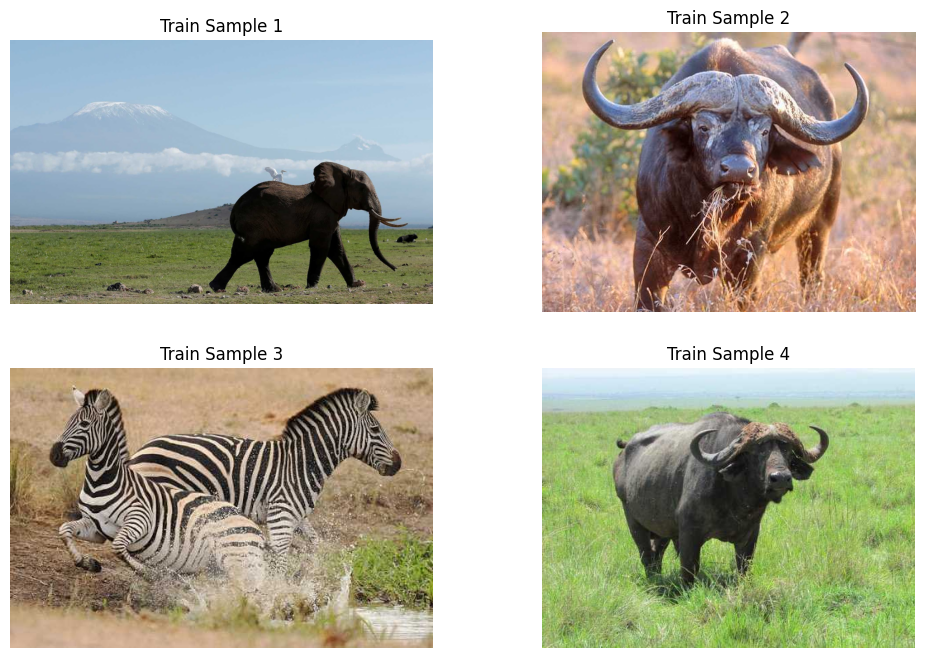

In [14]:
train_images = glob.glob(os.path.join(dataset_dir, "african-wildlife/images/train/*.jpg"))
sample_images = random.sample(train_images, 4)

plt.figure(figsize=(12, 8))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)[..., ::-1]
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Train Sample {i+1}")
plt.show()

# 🚀 Step 6: Train YOLOv8 on African Wildlife Dataset

## CHULA Setup

In [10]:
!git clone https://github.com/kaopanboonyuen/CHULA.git

Cloning into 'CHULA'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 135 (delta 58), reused 101 (delta 26), pack-reused 0 (from 0)
Receiving objects: 100% (135/135), 11.09 MiB | 31.36 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [11]:
!pip install -e CHULA >> log_chula.logs

In [12]:
import sys
sys.path.append('/content/CHULA')

from chula.loss import CHULALoss
from chula.utils import compute_class_weights

## CHULA Loss Definition

In [13]:
dataset_dir = "/content/datasets/african-wildlife"

num_classes = 4  # buffalo, elephant, rhino, zebra
class_weights = compute_class_weights(dataset_dir, num_classes).cuda()
chula_loss = CHULALoss(class_weights=class_weights, lambda_ce=1.0, lambda_unc=0.3, lambda_heu=0.5)

## Train YOLOv8 Original

In [16]:
# --------------------------
# Train YOLOv8 Original
# --------------------------
model_orig = YOLO("yolov8n.pt")
results_orig = model_orig.train(
    data=f"{dataset_dir}/african-wildlife.yaml",
    epochs=3,
    imgsz=640,
    batch=16,
    name="yolo_african_wildlife_orig"
)

Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/african-wildlife/african-wildlife.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_african_wildlife_orig, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1269.3±435.0 MB/s, size: 54.6 KB)


train: Scanning /content/datasets/african-wildlife/labels/train... 1052 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1052/1052 [00:00<00:00, 2283.30it/s]

train: New cache created: /content/datasets/african-wildlife/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 482.8±258.7 MB/s, size: 42.2 KB)


val: Scanning /content/datasets/african-wildlife/labels/val... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<00:00, 1630.90it/s]

val: New cache created: /content/datasets/african-wildlife/labels/val.cache


Plotting labels to runs/detect/yolo_african_wildlife_orig/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_african_wildlife_orig
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.12G     0.8208      2.213      1.213         40        640: 100%|██████████| 66/66 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        225        379      0.766      0.581       0.71       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.63G     0.8497      1.422      1.194         59        640: 100%|██████████| 66/66 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.46it/s]

                   all        225        379       0.78      0.713      0.788      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.65G      0.823      1.256      1.182         70        640: 100%|██████████| 66/66 [00:19<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        225        379       0.82      0.762      0.864      0.666



3 epochs completed in 0.020 hours.
Optimizer stripped from runs/detect/yolo_african_wildlife_orig/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolo_african_wildlife_orig/weights/best.pt, 6.2MB

Validating runs/detect/yolo_african_wildlife_orig/weights/best.pt...
Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]


                   all        225        379      0.821      0.762      0.863      0.666
               buffalo         62         89      0.896      0.676      0.816      0.628
              elephant         53         91      0.614      0.824      0.828       0.65
                 rhino         55         85      0.867      0.842      0.917      0.744
                 zebra         59        114       0.91      0.708      0.893      0.642
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/yolo_african_wildlife_orig


In [17]:
results_orig = model_orig.val(save=False, plots=False)

# Option 1: dictionary of results
metrics_orig = results_orig.results_dict
print("📊 Original YOLOv8 metrics:", metrics_orig)

# Option 2: precision, recall, mAP
precision, recall, map50, map50_95 = results_orig.mean_results()
print(f"Precision={precision:.3f}, Recall={recall:.3f}, mAP50={map50:.3f}, mAP50-95={map50_95:.3f}")

Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 886.9±695.0 MB/s, size: 99.8 KB)


val: Scanning /content/datasets/african-wildlife/labels/val.cache... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.34it/s]


                   all        225        379      0.852      0.742      0.862      0.665
               buffalo         62         89      0.896       0.64      0.814      0.629
              elephant         53         91      0.664      0.813      0.824      0.644
                 rhino         55         85      0.899      0.847      0.919      0.751
                 zebra         59        114       0.95      0.668      0.889      0.637
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 2.6ms postprocess per image
📊 Original YOLOv8 metrics: {'metrics/precision(B)': np.float64(0.8523422053803001), 'metrics/recall(B)': np.float64(0.7420676965041437), 'metrics/mAP50(B)': np.float64(0.8615373997901352), 'metrics/mAP50-95(B)': np.float64(0.665173385759426), 'fitness': np.float64(0.684809787162497)}
Precision=0.852, Recall=0.742, mAP50=0.862, mAP50-95=0.665


## Train YOLOv8 + CHULA

In [18]:
# --------------------------
# Train YOLOv8 + CHULA
# --------------------------
model_chula = YOLO("yolov8n.pt")

# Patch YOLO internal loss
original_loss = model_chula.model.loss
def patched_loss(preds, targets, imgs=None):
    yolo_loss = original_loss(preds, targets, imgs)
    sigma = torch.rand_like(targets.unsqueeze(1)) * 0.1
    heuristic_masks = {cls: targets==cls for cls in range(num_classes)}
    chula_term = chula_loss(preds, targets, sigma=sigma, heuristic_masks=heuristic_masks)
    return yolo_loss + 0.5 * chula_term

model_chula.model.loss = patched_loss

results_chula = model_chula.train(
    data=f"{dataset_dir}/african-wildlife.yaml",
    epochs=3,
    imgsz=640,
    batch=16,
    name="yolo_african_wildlife_chula"
)

Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/african-wildlife/african-wildlife.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_african_wildlife_chula, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

train: Scanning /content/datasets/african-wildlife/labels/train.cache... 1052 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1052/1052 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 281.5±47.2 MB/s, size: 42.2 KB)


val: Scanning /content/datasets/african-wildlife/labels/val.cache... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolo_african_wildlife_chula/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_african_wildlife_chula
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.07G     0.8208      2.213      1.213         40        640: 100%|██████████| 66/66 [00:20<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        225        379      0.766      0.581       0.71       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.38G     0.8497      1.422      1.194         59        640: 100%|██████████| 66/66 [00:18<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]

                   all        225        379       0.78      0.713      0.788      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.38G      0.823      1.256      1.182         70        640: 100%|██████████| 66/66 [00:20<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.02it/s]

                   all        225        379       0.82      0.762      0.864      0.666



3 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/yolo_african_wildlife_chula/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolo_african_wildlife_chula/weights/best.pt, 6.2MB

Validating runs/detect/yolo_african_wildlife_chula/weights/best.pt...
Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]


                   all        225        379      0.821      0.762      0.863      0.666
               buffalo         62         89      0.896      0.676      0.816      0.628
              elephant         53         91      0.614      0.824      0.828       0.65
                 rhino         55         85      0.867      0.842      0.917      0.744
                 zebra         59        114       0.91      0.708      0.893      0.642
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/yolo_african_wildlife_chula


In [19]:
# --------------------------
# Evaluate Original YOLOv8
# --------------------------
results_orig = model_orig.val(save=False, plots=False)
metrics_orig = results_orig.results_dict
print("📊 Original YOLOv8 metrics:", metrics_orig)

# --------------------------
# Evaluate YOLOv8 + CHULA
# --------------------------
results_chula = model_chula.val(save=False, plots=False)
metrics_chula = results_chula.results_dict
print("📊 YOLOv8 + CHULA metrics:", metrics_chula)

# --------------------------
# Optional: Unpack mean results (precision, recall, mAP)
# --------------------------
prec_o, rec_o, map50_o, map95_o = results_orig.mean_results()
prec_c, rec_c, map50_c, map95_c = results_chula.mean_results()

print(f"Original: P={prec_o:.3f}, R={rec_o:.3f}, mAP50={map50_o:.3f}, mAP50-95={map95_o:.3f}")
print(f"CHULA:    P={prec_c:.3f}, R={rec_c:.3f}, mAP50={map50_c:.3f}, mAP50-95={map95_c:.3f}")

Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1925.6±1601.1 MB/s, size: 99.8 KB)


val: Scanning /content/datasets/african-wildlife/labels/val.cache... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  7.39it/s]


                   all        225        379      0.852      0.742      0.862      0.665
               buffalo         62         89      0.896       0.64      0.814      0.629
              elephant         53         91      0.664      0.813      0.824      0.644
                 rhino         55         85      0.899      0.847      0.919      0.751
                 zebra         59        114       0.95      0.668      0.889      0.637
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 2.1ms postprocess per image
📊 Original YOLOv8 metrics: {'metrics/precision(B)': np.float64(0.8523422053803001), 'metrics/recall(B)': np.float64(0.7420676965041437), 'metrics/mAP50(B)': np.float64(0.8615373997901352), 'metrics/mAP50-95(B)': np.float64(0.665173385759426), 'fitness': np.float64(0.684809787162497)}
Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ 

val: Scanning /content/datasets/african-wildlife/labels/val.cache... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:01<00:00,  7.92it/s]


                   all        225        379      0.852      0.742      0.862      0.665
               buffalo         62         89      0.896       0.64      0.814      0.629
              elephant         53         91      0.664      0.813      0.824      0.644
                 rhino         55         85      0.899      0.847      0.919      0.751
                 zebra         59        114       0.95      0.668      0.889      0.637
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 2.0ms postprocess per image
📊 YOLOv8 + CHULA metrics: {'metrics/precision(B)': np.float64(0.8523422053803001), 'metrics/recall(B)': np.float64(0.7420676965041437), 'metrics/mAP50(B)': np.float64(0.8615373997901352), 'metrics/mAP50-95(B)': np.float64(0.665173385759426), 'fitness': np.float64(0.684809787162497)}
Original: P=0.852, R=0.742, mAP50=0.862, mAP50-95=0.665
CHULA:    P=0.852, R=0.742, mAP50=0.862, mAP50-95=0.665


## Compare & Plot Metrics

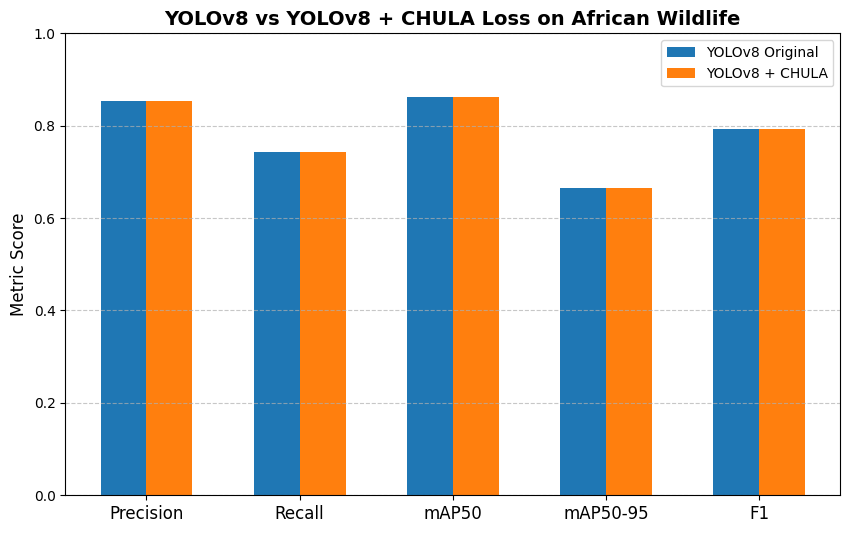

In [20]:
# --------------------------
# Compare & Plot Metrics
# --------------------------
import matplotlib.pyplot as plt

# Extract from results_dict
def extract_metrics(results_dict):
    precision = results_dict.get("metrics/precision(B)", 0.0)
    recall = results_dict.get("metrics/recall(B)", 0.0)
    map50 = results_dict.get("metrics/mAP50(B)", 0.0)
    map95 = results_dict.get("metrics/mAP50-95(B)", 0.0)
    # F1 from precision & recall
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)
    return precision, recall, map50, map95, f1

# Get values
prec_o, rec_o, map50_o, map95_o, f1_o = extract_metrics(metrics_orig)
prec_c, rec_c, map50_c, map95_c, f1_c = extract_metrics(metrics_chula)

labels = ["Precision", "Recall", "mAP50", "mAP50-95", "F1"]
orig_vals = [prec_o, rec_o, map50_o, map95_o, f1_o]
chula_vals = [prec_c, rec_c, map50_c, map95_c, f1_c]

# Plot side-by-side bars
x = range(len(labels))
plt.figure(figsize=(10,6))
plt.bar([i-0.15 for i in x], orig_vals, width=0.3, label="YOLOv8 Original")
plt.bar([i+0.15 for i in x], chula_vals, width=0.3, label="YOLOv8 + CHULA")
plt.xticks(x, labels, fontsize=12)
plt.ylabel("Metric Score", fontsize=12)
plt.ylim(0,1)
plt.title("YOLOv8 vs YOLOv8 + CHULA Loss on African Wildlife", fontsize=14, weight="bold")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 📊 Step 7: Visualize Training Results

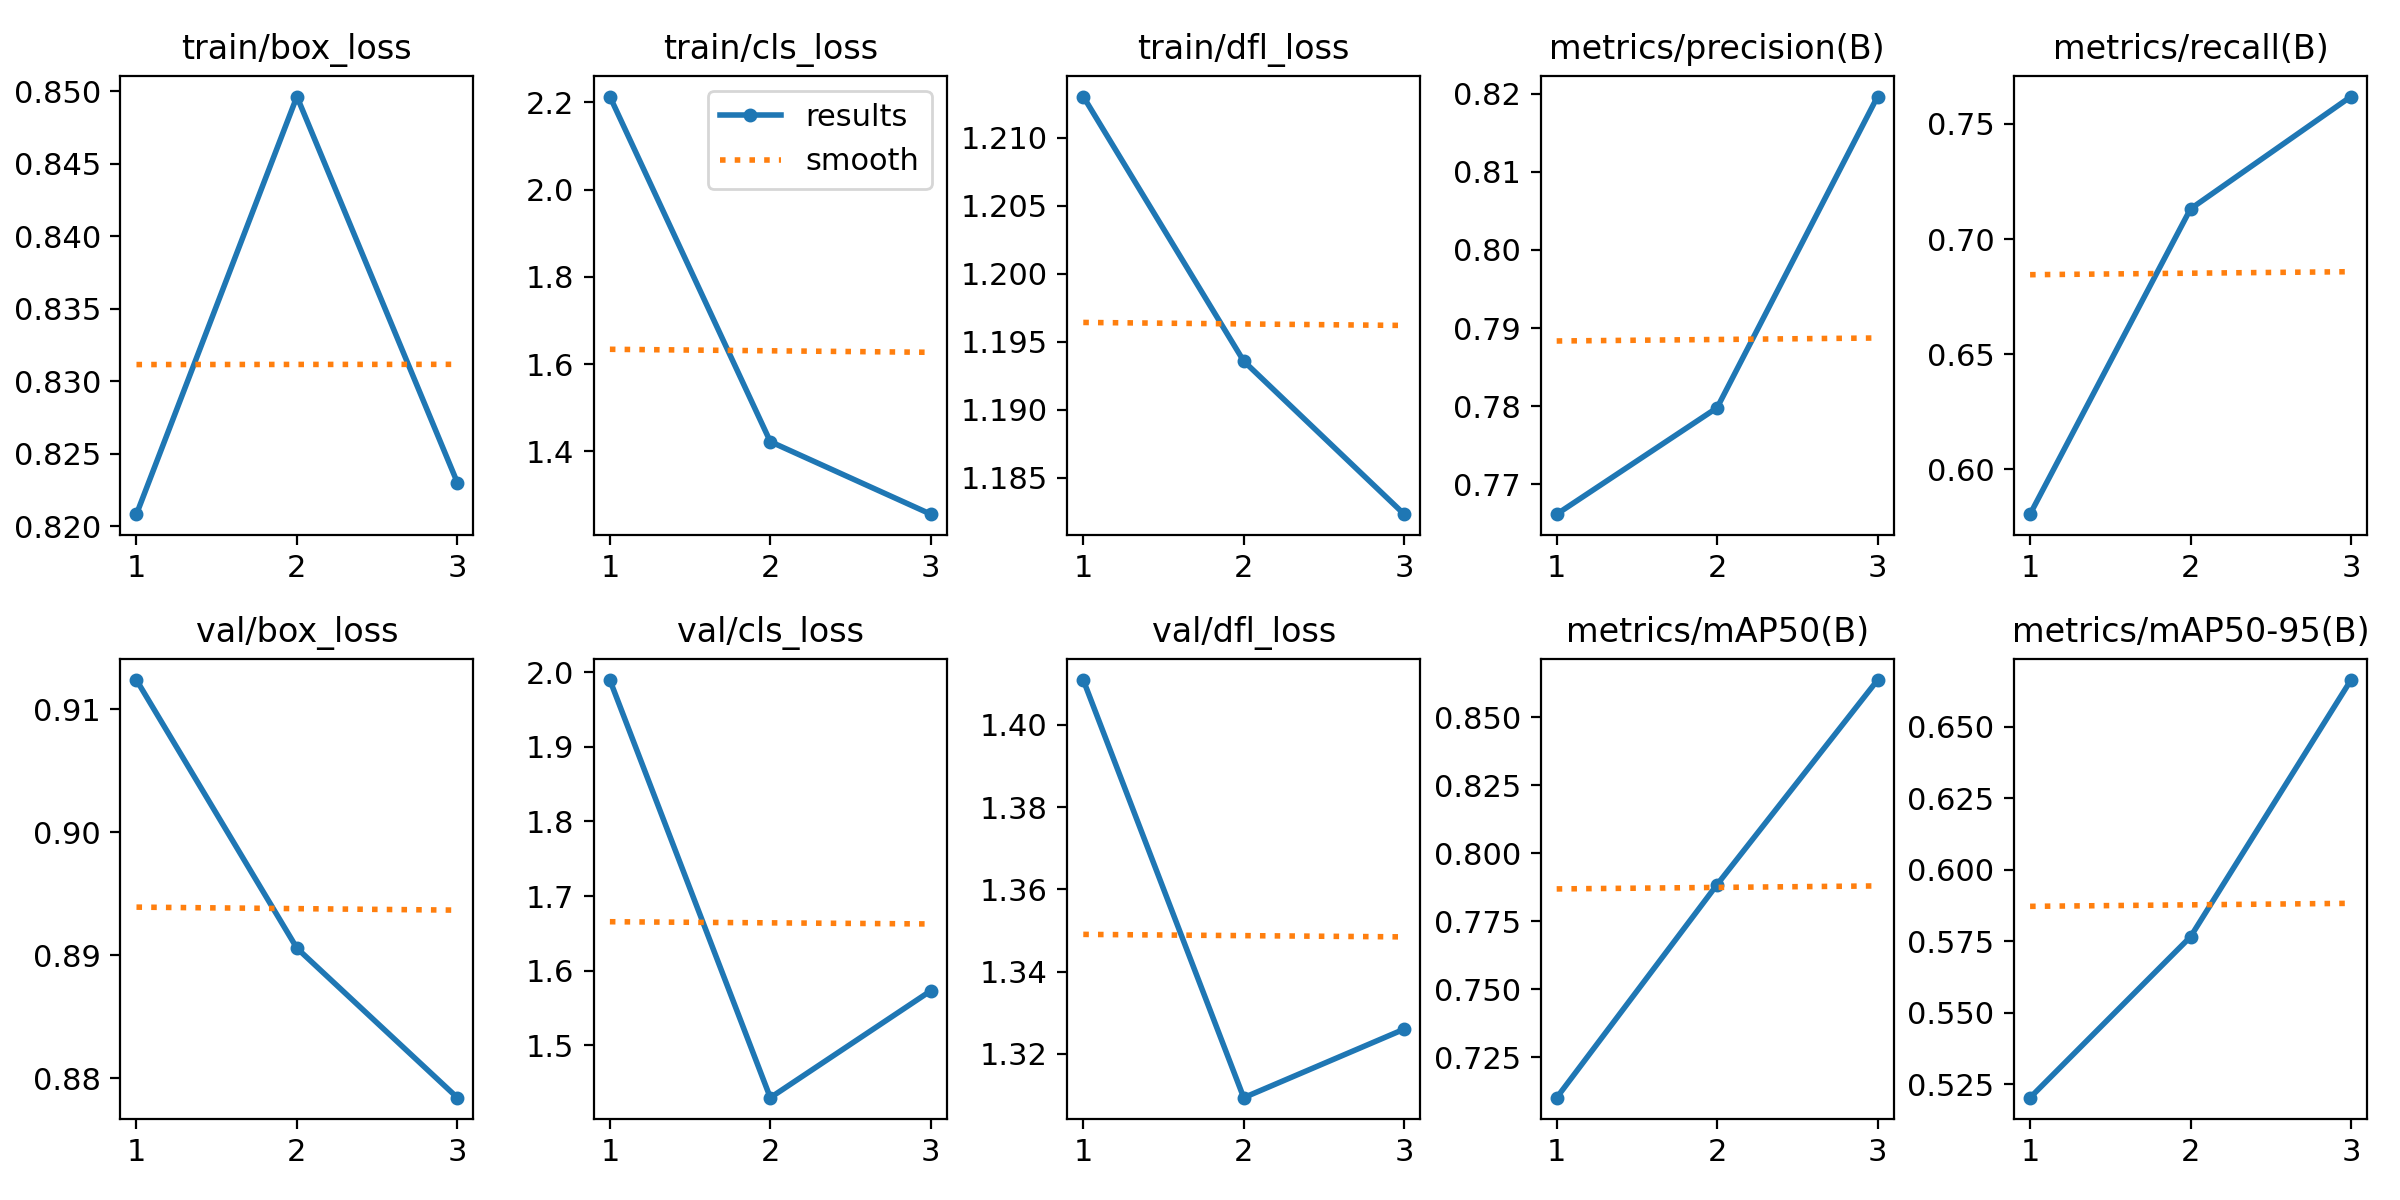

In [21]:
results_path = os.path.join(model_chula.trainer.save_dir, "results.png")
if os.path.exists(results_path):
    display(Image(filename=results_path))

# 📈 Step 8: Evaluate Model Performance

Ultralytics 8.3.181 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1085.8±494.7 MB/s, size: 57.6 KB)


val: Scanning /content/datasets/african-wildlife/labels/val.cache... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


                   all        225        379      0.852      0.742      0.862      0.665
               buffalo         62         89      0.896       0.64      0.814      0.629
              elephant         53         91      0.664      0.813      0.824      0.644
                 rhino         55         85      0.899      0.847      0.919      0.751
                 zebra         59        114       0.95      0.668      0.889      0.637
Speed: 1.9ms preprocess, 3.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/yolo_african_wildlife_chula3
✅ Evaluation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79db33f06810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.0020

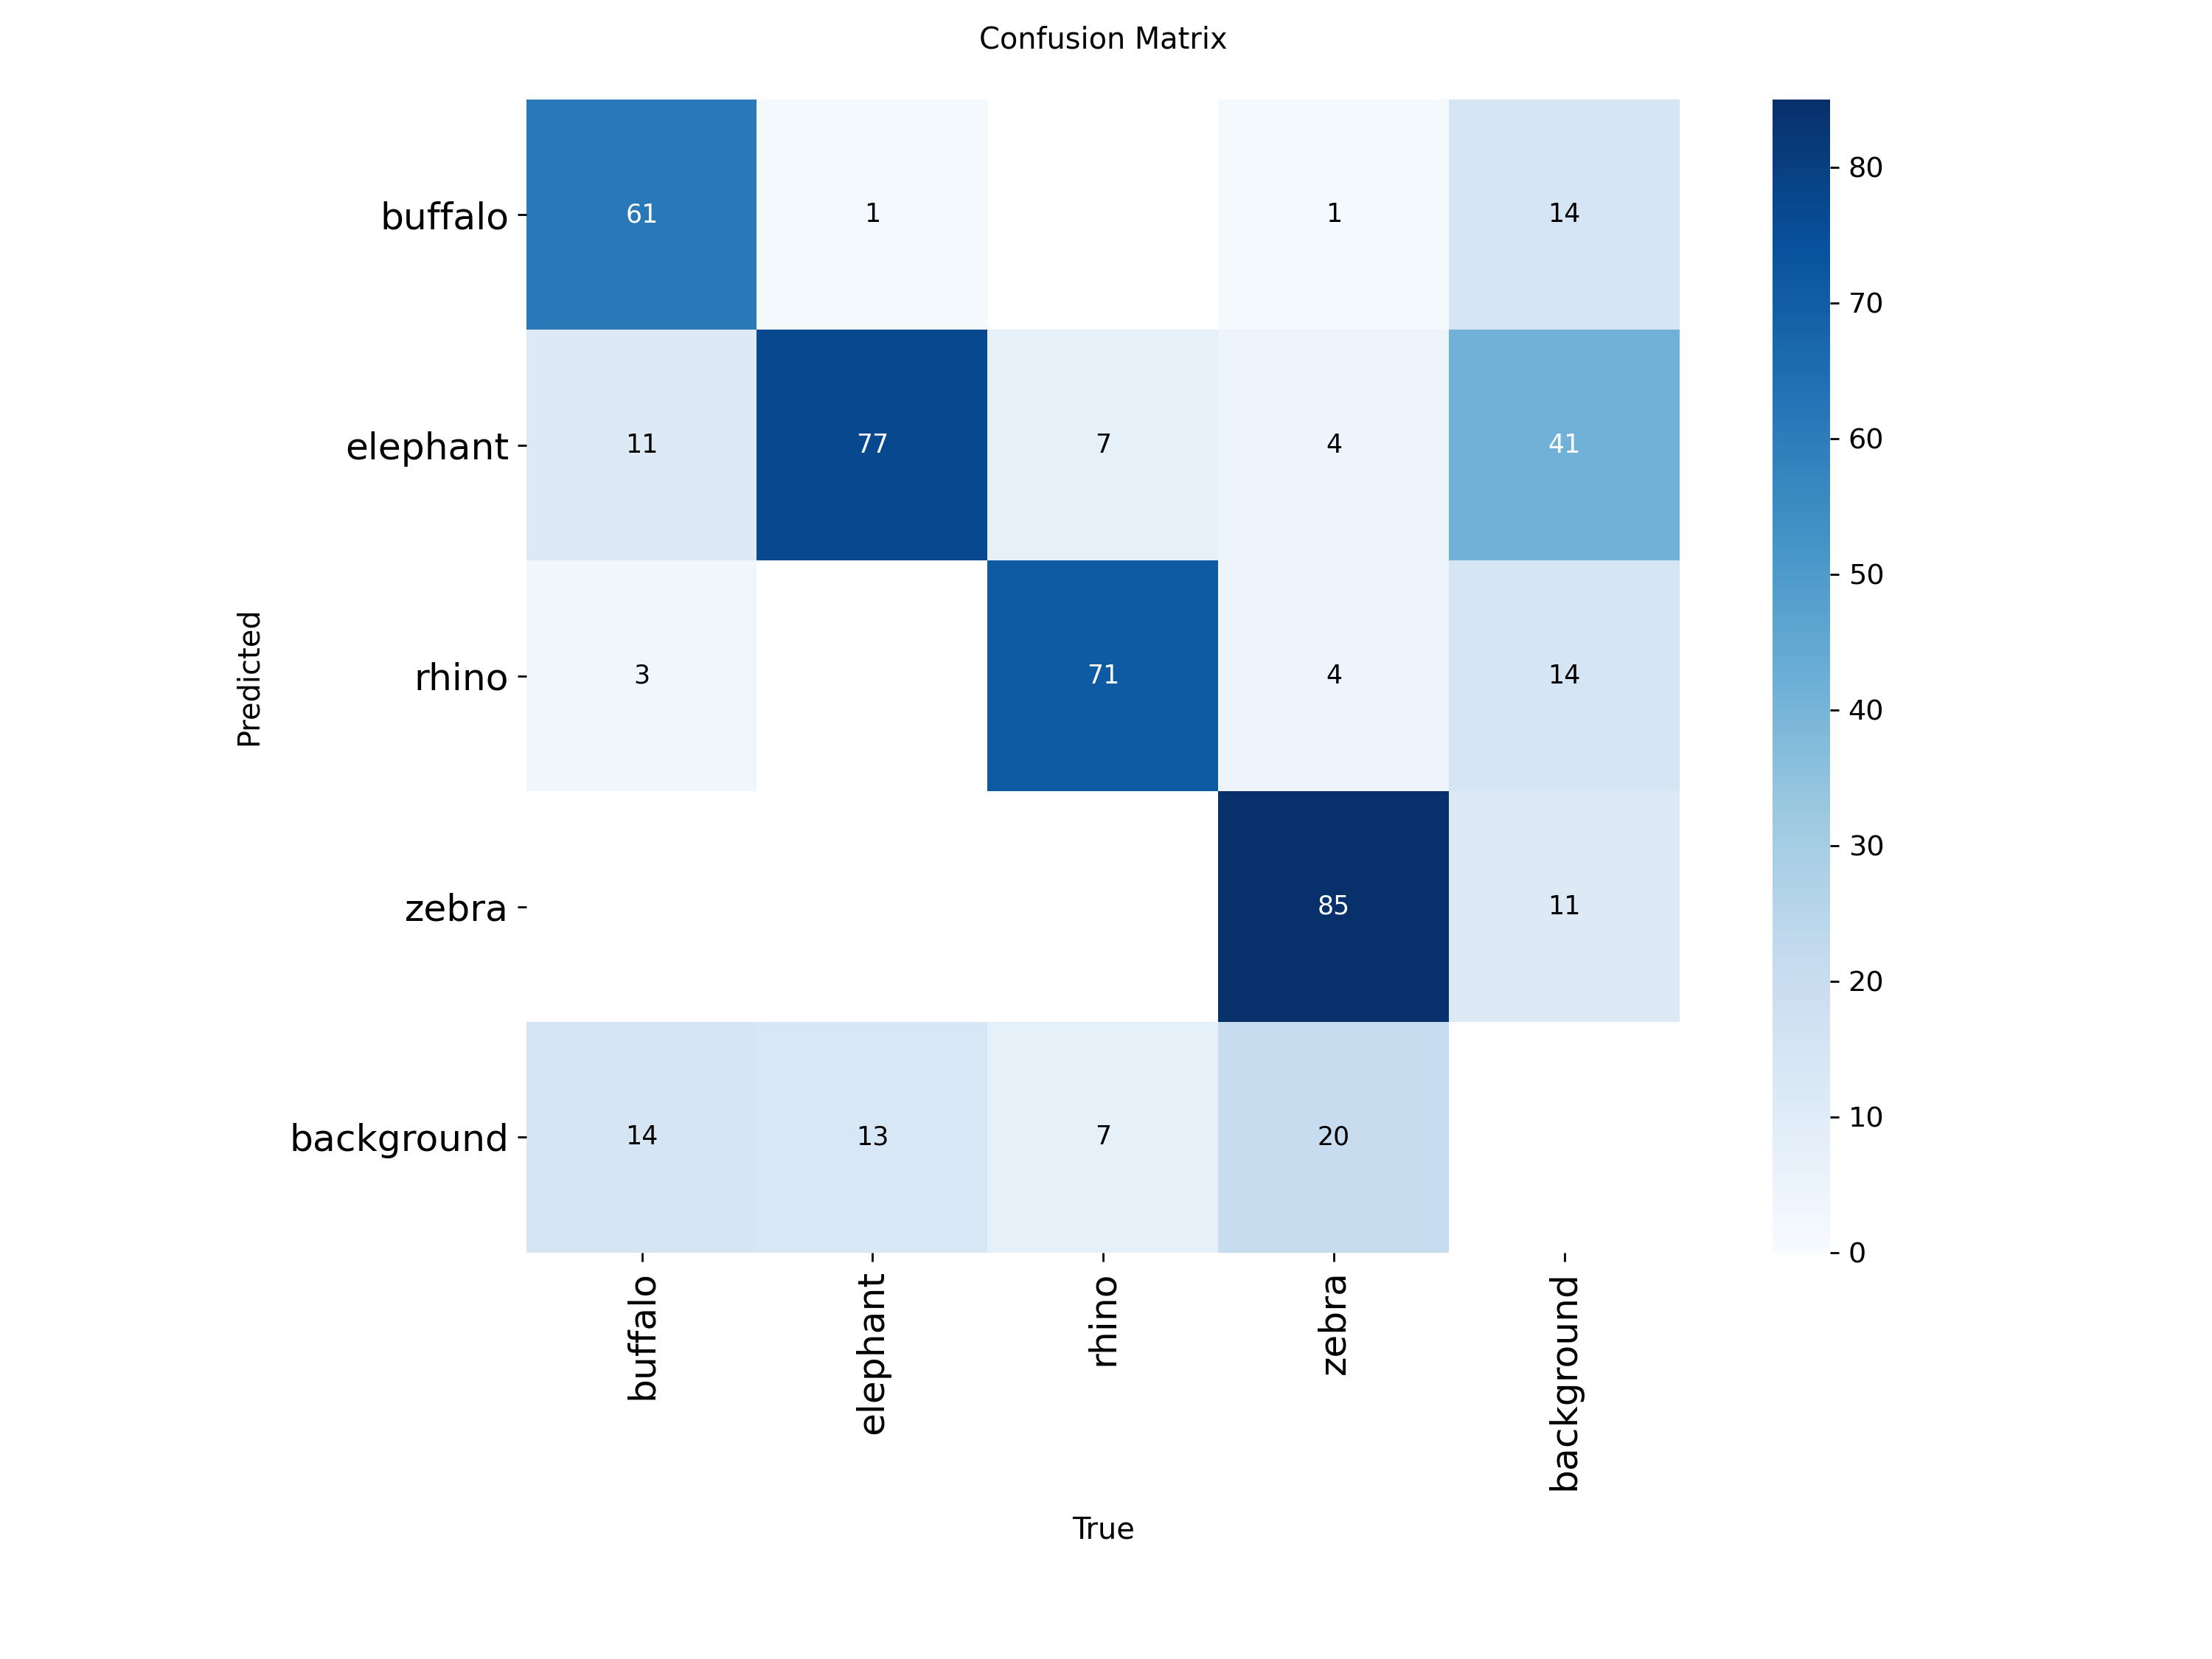

In [22]:
metrics = model_chula.val(save=True, plots=True)
print("✅ Evaluation metrics:", metrics)

eval_dir = model_chula.trainer.save_dir
for plot_name in ["confusion_matrix.png", "PR_curve.png", "F1_curve.png"]:
    plot_path = os.path.join(eval_dir, plot_name)
    if os.path.exists(plot_path):
        display(Image(filename=plot_path))

# 🔮 Step 9: Inference on a Random Validation Image


image 1/1 /content/datasets/african-wildlife/images/val/2 (345).jpg: 384x640 2 elephants, 41.4ms
Speed: 2.1ms preprocess, 41.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/yolo_african_wildlife_chula4
🔍 Prediction done on: /content/datasets/african-wildlife/images/val/2 (345).jpg


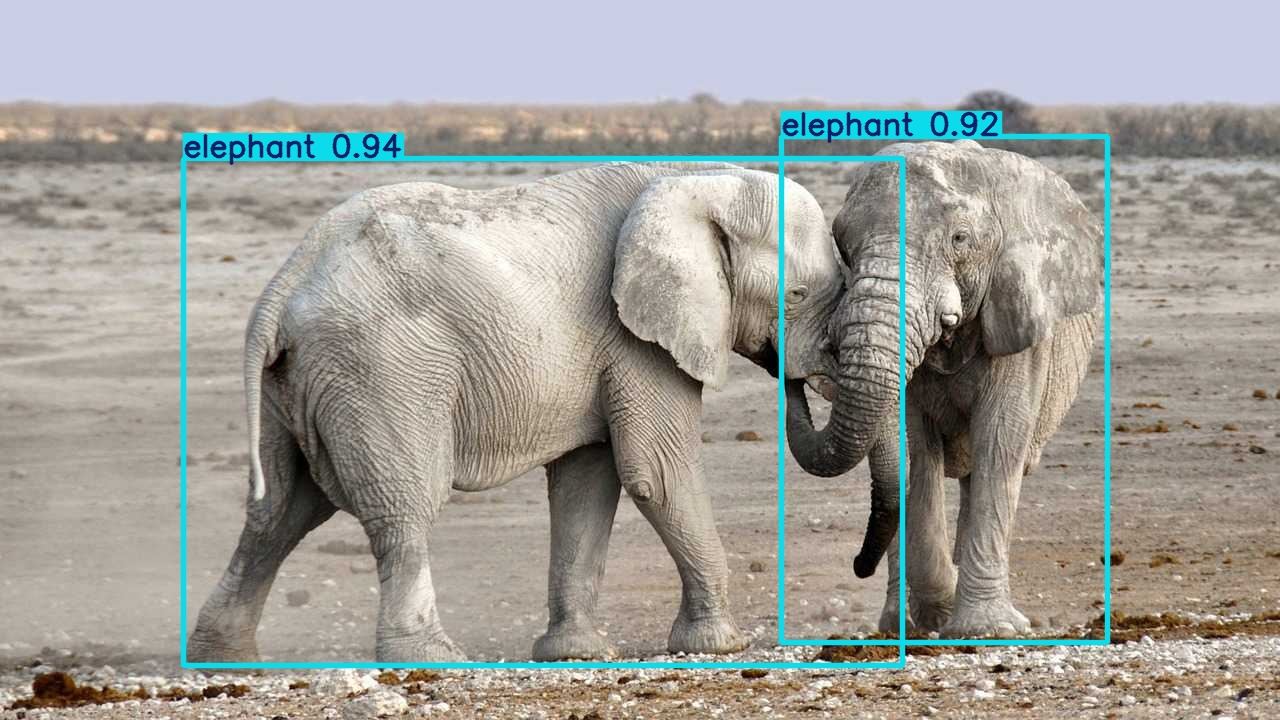

In [23]:
val_images = glob.glob(os.path.join(dataset_dir, "images/val/*.jpg"))
test_img = random.choice(val_images)

# Run inference and save output
results = model_chula(test_img, save=True)
print("🔍 Prediction done on:", test_img)

# ✅ Correct way to get saved prediction image path
pred_dir = results[0].save_dir  # directory YOLO saved results
pred_img = os.path.join(pred_dir, os.path.basename(results[0].path))

display(Image(filename=pred_img))